# Ordinary Regression

From [http://openonlinecourses.com/causalanalysis/Ordinary%20Regression.asp](http://openonlinecourses.com/causalanalysis/Ordinary%20Regression.asp).

## Question 1

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.DataFrame({
    'y': [10, 12, 10, 12, 14],
    'x': [1, 2, 3, 4, 5]
})

X = df[['x']]
y = df['y']

model = LinearRegression()
model.fit(X, y)

model.intercept_, model.coef_

(9.2, array([0.8]))

Plot the points and line.

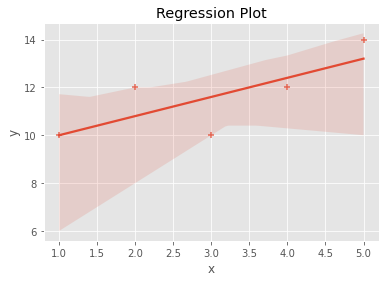

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

ax = sns.regplot(x='x', y='y', data=df, marker='+')
_ = ax.set_title('Regression Plot')

Calculate the residuals.

In [3]:
import numpy as np

df['y_pred'] = model.predict(X)
df['residual'] = df['y'] - df['y_pred']
df['squared_residual'] = np.power(df['residual'], 2.0)
df

,y,x,y_pred,residual,squared_residual
0,10,1,10.0,0.0,0.00
1,12,2,10.8,1.2,1.44
2,10,3,11.6,-1.6,2.56
3,12,4,12.4,-0.4,0.16
4,14,5,13.2,0.8,0.64


Calculate the sum of squared residuals.

In [4]:
r1 = df['squared_residual'].sum()
r1

4.8000000000000025

### Increase the intercept by 20%

Recalculate the sum of squared residuals and re-plot the line when the intercept is increased by 20%.

In [5]:
b = model.intercept_ + model.intercept_ * 0.2

df['y_pred'] = b + model.coef_[0] * df['x']
df['residual'] = df['y'] - df['y_pred']
df['squared_residual'] = np.power(df['residual'], 2.0)
df

,y,x,y_pred,residual,squared_residual
0,10,1,11.84,-1.84,3.3856
1,12,2,12.64,-0.64,0.4096
2,10,3,13.44,-3.44,11.8336
3,12,4,14.24,-2.24,5.0176
4,14,5,15.04,-1.04,1.0816


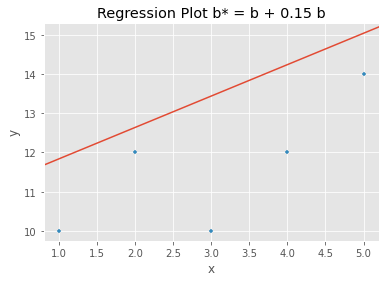

In [6]:
ax = df.plot(kind='scatter', x='x', y='y', marker='+')

x1, y1 = df.iloc[0]['x'], df.iloc[0]['y_pred']
x2, y2 = df.iloc[-1]['x'], df.iloc[-1]['y_pred']

_ = ax.axline((x1, y1), (x2, y2))
_ = ax.set_title('Regression Plot b* = b + 0.15 b')

In [7]:
r2 = df['squared_residual'].sum()
r2

21.727999999999984

### Decrease the intercept by 20%

Recalculate the sum of squared residuals and re-plot the line when the intercept is decreased by 20%.

In [8]:
b = model.intercept_ - model.intercept_ * 0.2

df['y_pred'] = b + model.coef_[0] * df['x']
df['residual'] = df['y'] - df['y_pred']
df['squared_residual'] = np.power(df['residual'], 2.0)
df

,y,x,y_pred,residual,squared_residual
0,10,1,8.16,1.84,3.3856
1,12,2,8.96,3.04,9.2416
2,10,3,9.76,0.24,0.0576
3,12,4,10.56,1.44,2.0736
4,14,5,11.36,2.64,6.9696


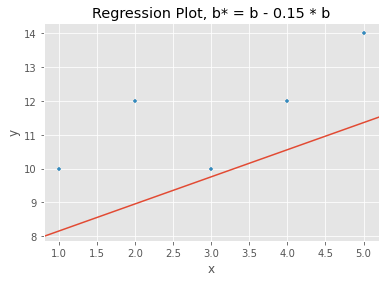

In [9]:
ax = df.plot(kind='scatter', x='x', y='y', marker='+')

x1, y1 = df.iloc[0]['x'], df.iloc[0]['y_pred']
x2, y2 = df.iloc[-1]['x'], df.iloc[-1]['y_pred']

_ = ax.axline((x1, y1), (x2, y2))
_ = ax.set_title('Regression Plot, b* = b - 0.15 * b')

In [10]:
r3 = df['squared_residual'].sum()
r3

21.728000000000016

### Increase the coefficient by 20%

In [11]:
b1 = model.coef_[0] + model.coef_[0] * 0.2

df['y_pred'] = model.intercept_ + b1 * df['x']
df['residual'] = df['y'] - df['y_pred']
df['squared_residual'] = np.power(df['residual'], 2.0)
df

,y,x,y_pred,residual,squared_residual
0,10,1,10.16,-0.16,0.0256
1,12,2,11.12,0.88,0.7744
2,10,3,12.08,-2.08,4.3264
3,12,4,13.04,-1.04,1.0816
4,14,5,14.00,0.00,0.0000


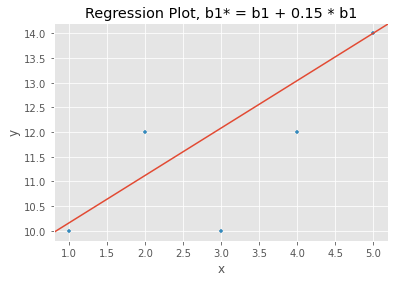

In [12]:
ax = df.plot(kind='scatter', x='x', y='y', marker='+')

x1, y1 = df.iloc[0]['x'], df.iloc[0]['y_pred']
x2, y2 = df.iloc[-1]['x'], df.iloc[-1]['y_pred']

_ = ax.axline((x1, y1), (x2, y2))
_ = ax.set_title('Regression Plot, b1* = b1 + 0.15 * b1')

In [13]:
r4 = df['squared_residual'].sum()
r4

6.207999999999992

### Decrease the coefficient by 20%

In [14]:
b1 = model.coef_[0] - model.coef_[0] * 0.2

df['y_pred'] = model.intercept_ + b1 * df['x']
df['residual'] = df['y'] - df['y_pred']
df['squared_residual'] = np.power(df['residual'], 2.0)
df

,y,x,y_pred,residual,squared_residual
0,10,1,9.84,0.16,0.0256
1,12,2,10.48,1.52,2.3104
2,10,3,11.12,-1.12,1.2544
3,12,4,11.76,0.24,0.0576
4,14,5,12.40,1.60,2.5600


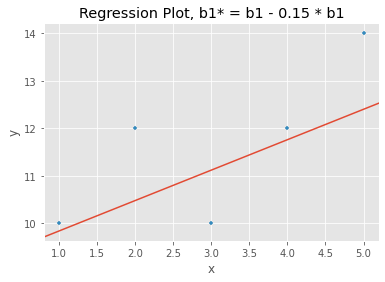

In [15]:
ax = df.plot(kind='scatter', x='x', y='y', marker='+')

x1, y1 = df.iloc[0]['x'], df.iloc[0]['y_pred']
x2, y2 = df.iloc[-1]['x'], df.iloc[-1]['y_pred']

_ = ax.axline((x1, y1), (x2, y2))
_ = ax.set_title('Regression Plot, b1* = b1 - 0.15 * b1')

In [16]:
r5 = df['squared_residual'].sum()
r5

6.208000000000007

### Which of these 5 lines minimizes the sum of squared residuals and by how much?

The model produced by ordinary regression (Scikit-Learn) produces the sum of squared residual that is the lowest.

In [17]:
pd.DataFrame([
    ('scikit', r1),
    ('increase_b', r2),
    ('decrease_b', r3),
    ('increase_b1', r4),
    ('decrease_b1', r5)
], columns=['model', 'sum_of_squared_residual']).sort_values(['sum_of_squared_residual'])

,model,sum_of_squared_residual
0,scikit,4.800
3,increase_b1,6.208
4,decrease_b1,6.208
1,increase_b,21.728
2,decrease_b,21.728


## Question 2

### Step 1: clean

In [18]:
df = pd.read_csv('MFH cost Jan 2018.csv', low_memory=False)
df.shape

(39139, 540)

In [19]:
df = df.drop_duplicates()
df.shape

(39139, 540)

In [20]:
df[['age', 'dayssurvived']].isna().sum() / df.shape[0]

age             0.320243
dayssurvived    0.603388
dtype: float64

### Step 2: describe univariate statistical properties

In [21]:
df[['age', 'gender', 'dayssurvived', 'Daily All Cost']].describe()

,age,dayssurvived,Daily All Cost
count,26605.000000,15523.000000,39139.000000
mean,72.159895,1398.196289,250.493208
std,12.403902,969.020255,325.002145
min,22.000000,14.000000,0.000000
25%,63.000000,687.000000,85.837450
50%,73.000000,1107.000000,180.140400
75%,83.000000,1830.500000,299.267589
max,105.000000,6210.000000,12210.619010


Check for nullness or data missingness.

In [22]:
df[['age', 'gender', 'dayssurvived', 'Daily All Cost']].isna().sum() / df.shape[0]

age               0.320243
gender            0.320167
dayssurvived      0.603388
Daily All Cost    0.000000
dtype: float64

### Step 3: check if cost is normal

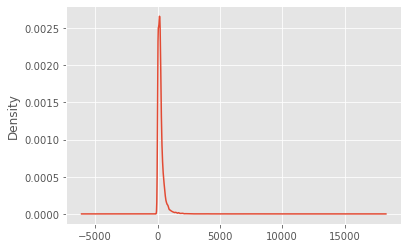

In [23]:
s = df.dropna(subset=['Daily All Cost'])['Daily All Cost']
s = s[s > 0]
_ = s.plot(kind='kde')

Do a log transform.

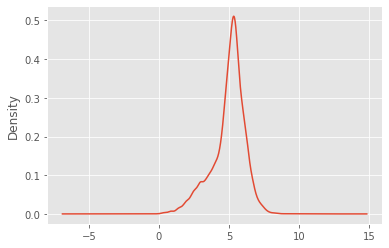

In [24]:
s = df.dropna(subset=['Daily All Cost'])['Daily All Cost']
s = s[s > 0]
s = np.log(s)
_ = s.plot(kind='kde')

### Step 4: age vs cost

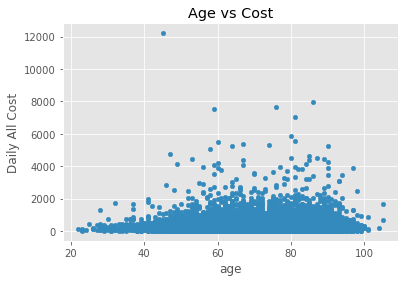

In [25]:
ax = df.plot(kind='scatter', x='age', y='Daily All Cost')
_ = ax.set_title('Age vs Cost')

### Step 5: cost ~ age + gender

Check impact of age and gender on cost.

In [26]:
df['gender'].value_counts()

M    25583
F     1025
Name: gender, dtype: int64

In [27]:
X = df.dropna(subset=['age', 'gender', 'Daily All Cost'])
X = X[X['Daily All Cost'] > 0]
X['gender'] = X['gender'].apply(lambda v: 1 if v == 'M' else 0)
X, y = X[['age', 'gender']], X['Daily All Cost']

X.shape, y.shape

((26605, 2), (26605,))

In [28]:
model = LinearRegression()
model.fit(X, y)

model.intercept_, model.coef_

(264.3420036647272, array([0.12883604, 0.63987923]))

In [29]:
from sklearn.metrics import r2_score, explained_variance_score

r2_score(y, model.predict(X)), np.sqrt(r2_score(y, model.predict(X)))

(2.242432612920009e-05, 0.004735433045583063)

### Step 6: cost ~ survival

Check impact of survival on cost.

In [30]:
X = df.dropna(subset=['dayssurvived', 'Daily All Cost'])
X = X[X['Daily All Cost'] > 0]
X, y = X[['dayssurvived']], X['Daily All Cost']

X.shape, y.shape

((15523, 1), (15523,))

In [31]:
model = LinearRegression()
model.fit(X, y)

model.intercept_, model.coef_

(282.0917926741384, array([-0.00540544]))

In [32]:
r2_score(y, model.predict(X)), np.sqrt(r2_score(y, model.predict(X)))

(0.0002115531865428677, 0.014544868048314076)

### Step 7: cost ~ .

Regress cost on all other variables.

In [33]:
def is_valid_col(name):
    if name in ['Row_ID', 'Unnamed: 37', 'scrssn', 'cohort', 'Daily_In_Org', 'Daily_Out_Org', 'DaysFollowedInOrg', 'DaysFollowedOutOrg']:
        return False
    if name.startswith('ccs'):
        return False
    if name.endswith('_365') or name.endswith('_30'):
        return False
    return True

X = df[[c for c in df.columns if is_valid_col(c)]]
X = X.dropna()
X['gender'] = X['gender'].apply(lambda g: 1 if g == 'M' else 0)
X['race_black'] = X['race'].apply(lambda r: 1 if r == 'B' else 0)
X['race_asian'] = X['race'].apply(lambda r: 1 if r == 'A' else 0)
X = X.drop(columns=['race'])
X, y = X[[c for c in X.columns if c != 'Daily All Cost']], X['Daily All Cost']

X.shape, y.shape

((13747, 16), (13747,))

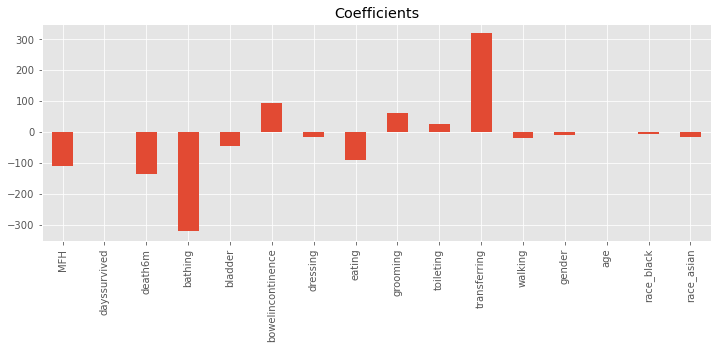

In [34]:
model = LinearRegression()
model.fit(X, y)

s = pd.Series(model.coef_, index=X.columns)
_ = s.plot(kind='bar', figsize=(12, 4), title='Coefficients')

### Step 8: plot residuals

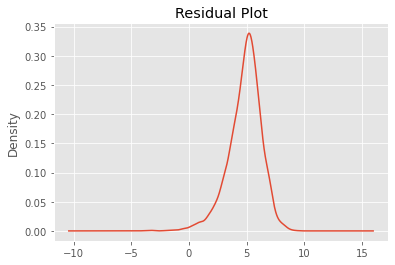

In [35]:
s = y - model.predict(X)
s = s[s > 0]
s = np.log(s)
_ = s.plot(kind='kde', title='Residual Plot')

Using the Anderson-Darling test for normal distribution. If p < $\alpha=0.05$, then the results mean non-normal.

In [36]:
from statsmodels.stats.diagnostic import normal_ad

_, p_value = normal_ad(s)
p_value

0.0

### Step 9: compute R^2

In [37]:
r2_score(y, model.predict(X))

0.020959596864369434

### Step 10: top 10 predictors

In [38]:
np.abs(s).sort_values(ascending=False)[0:10]

10110    9.382847
7488     8.947514
18820    8.895615
22632    8.809463
11447    8.624106
21842    8.547479
6151     8.522604
13603    8.515961
12962    8.363580
10538    8.361604
Name: Daily All Cost, dtype: float64

### Step 11: does MFH contribute to cost of care?

Yes. Why?

## Question 3

In [39]:
df = pd.read_excel('High Cost Users.xlsx')
df.shape

(33, 5)

In [40]:
X = df[['Male', 'Over 65 Years', 'High Cost User']]
y = df['Cost']

X.shape, y.shape

((33, 3), (33,))

In [41]:
model = LinearRegression()
model.fit(X, y)

model.intercept_, model.coef_

(-6420.003088115038, array([ 9881.80591782, 11644.75980574, 12625.33537389]))

In [42]:
r2_score(y, model.predict(X))

0.840486063379756

## Question 4

If X1 and X2 are significant predictors of Y, X3 and X4 are not, and no interactions are significant; then what is the Markov Blanket for Y?  How is the concept of Markov Blanket related to multi-collinearity? 

Suppose X2 occurs after Y and X1 occurs prior to Y, what is a Markov Blanket that separates variables that are irrelevant and could possibly be causes of Y.  Keep in mind that a cause is something that occurs prior to effect, has a significant association with the effect, has a mechanism leading from cause to effect, and if cause is removed then the effect is less likely to occur, Cetris Peribus. 